# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
%matplotlib inline

In [2]:
import sklearn
from sklearn import preprocessing 

In [3]:
import pandas as pd

bank = pd.read_csv('./bank.csv')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [4]:
bank.shape

(41188, 20)

In [5]:
bank.describe()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
bank.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [8]:
bank.rename(columns={'y':'output'}, inplace= True)

In [9]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<AxesSubplot:xlabel='output', ylabel='count'>

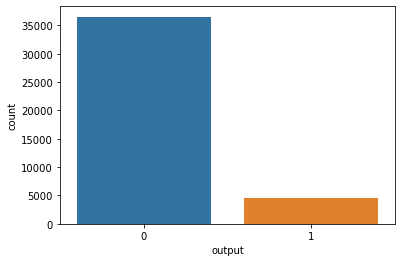

In [10]:
sns.countplot(x= 'output', data= bank)

#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

In [11]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
output              int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

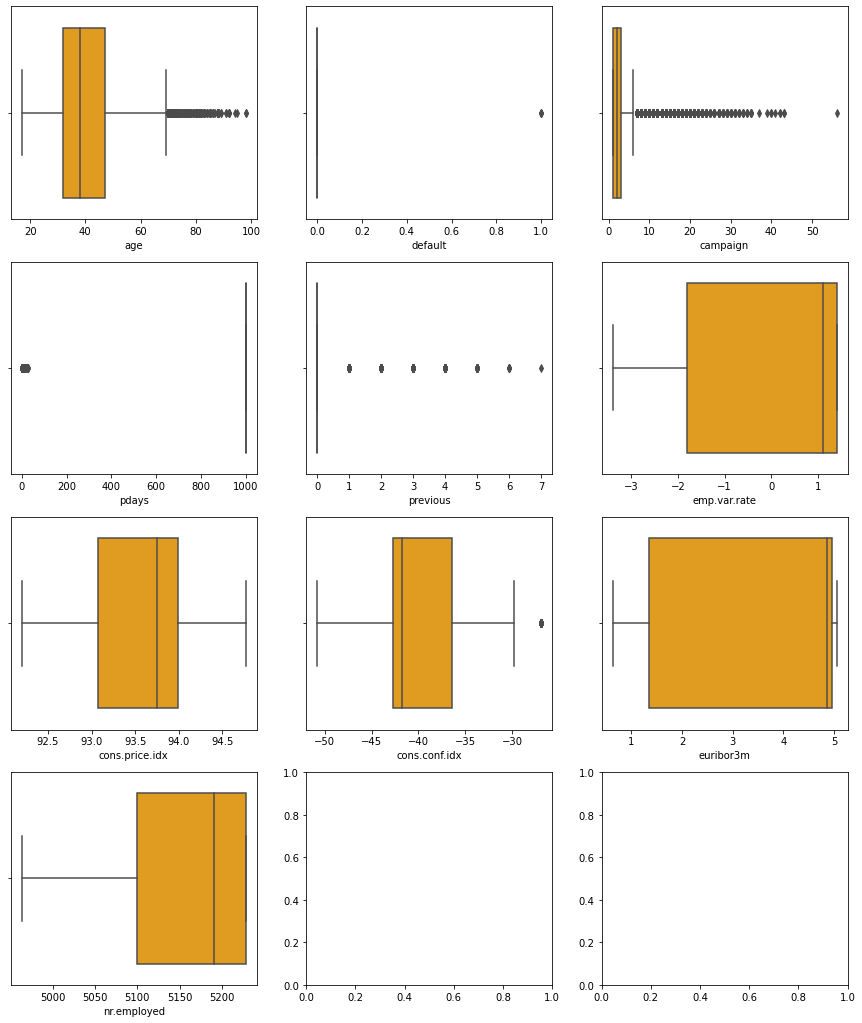

In [12]:
## for multiple columns
fig, ax = plt.subplots(4, 3, figsize=(15, 18))


columns = bank[['age', 'default','campaign', 'pdays', 'previous','emp.var.rate','cons.price.idx',
                    'cons.conf.idx', 'euribor3m','nr.employed']]

for i, subplots in zip(columns, ax.flatten()):
    graph = sns.boxplot(x=columns[i], ax=subplots, color='orange')

plt.show
   

### Handling missing values

In [13]:
bank_df=bank.copy()

In [14]:
print (bank_df.housing.value_counts(dropna=False))

1.0    21576
0.0    18622
NaN      990
Name: housing, dtype: int64


In [15]:
bank_df.groupby(by = ['output'])['housing'].value_counts()

output  housing
0       1.0        19069
        0.0        16596
1       1.0         2507
        0.0         2026
Name: housing, dtype: int64

In [16]:
bank_df.groupby(by = ['output'])['loan'].value_counts()

output  loan
0       0.0     30100
        1.0      5565
1       0.0      3850
        1.0       683
Name: loan, dtype: int64

In [17]:
bank_df.groupby(by = ['loan'])['housing'].value_counts()

loan  housing
0.0   1.0        17885
      0.0        16065
1.0   1.0         3691
      0.0         2557
Name: housing, dtype: int64

In [18]:
bank_df = bank_df.dropna(subset=['housing'])


In [19]:
bank_df.shape

(40198, 20)

In [20]:
bank_df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8370
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
output               0
dtype: int64

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

In [21]:
# There are outliers in age,Campaign, pdays and previous
# we handle the outliers by finding IQR of some columns 
# And other columns such as pdays and previous having huge amount of outlier and it 
# requires further investigation beforing dropping

### Handling outliers in age Column

In [22]:
bank.shape

(41188, 20)

In [23]:
Q1=bank_df.age.quantile(0.25)
Q3=bank_df.age.quantile(0.75)
IQR=Q3-Q1
LR=Q1-(IQR*1.5)
UR=Q3+(IQR*1.5)
print("LR:", LR, "UR:", UR)

LR: 9.5 UR: 69.5


In [24]:
bank_df = bank_df[(bank_df['age']>LR) & (bank_df['age']<UR)]

In [25]:
bank_df.shape

(39738, 20)

### Handling outliers in Campaign Column

In [26]:
Q1=bank_df.campaign.quantile(0.25)
Q3=bank_df.campaign.quantile(0.75)
IQR=Q3-Q1
LR=Q1-(IQR*1.5)
UR=Q3+(IQR*1.5)
print("LR:", LR, "UR:", UR)

LR: -2.0 UR: 6.0


In [27]:
bank_df = bank_df[(bank_df['campaign']>LR) & (bank_df['campaign']<UR)]

In [28]:
bank_df.shape

(36454, 20)

### Handling outliers in pdays and previous Columns

In [29]:
## Check how many clients are not previously contacted
bank_df.value_counts([bank_df['pdays']==999])

pdays
True     35103
False     1351
dtype: int64

In [30]:
## Check how many clients are not previously contacted
bank_df['default'].value_counts()

0.0    28950
1.0        3
Name: default, dtype: int64

In [31]:
bank_df.value_counts([bank_df['previous']==0])

previous
True        31359
False        5095
dtype: int64

**As seen above pdays==999 means these  client was not previously contacted and also previous ==0 values of pdays
we will drop pdays column**

In [32]:
bank_df.drop('pdays',inplace=True,axis=1)

In [33]:
# There are many outliers in default so drop that column
bank_df.drop('default',inplace=True,axis=1)

In [34]:
bank_df.head(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
0,56,housemaid,married,basic.4y,0.0,0.0,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0.0,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [35]:
bank_df.shape

(36454, 18)

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

In [36]:
[col for col in bank_df.columns if bank_df[col].dtype=="object"]


['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

married     22053
single      10366
divorced     3970
unknown        65
Name: marital, dtype: int64


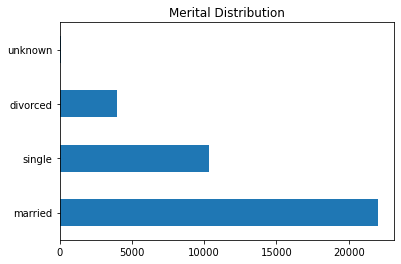

In [37]:
bank_df.marital.value_counts().plot(kind = "barh").set(title = "Merital Distribution")
print(bank_df.marital.value_counts())

admin.           9306
blue-collar      8274
technician       6030
services         3542
management       2634
entrepreneur     1323
self-employed    1266
retired          1168
housemaid         916
unemployed        899
student           812
unknown           284
Name: job, dtype: int64


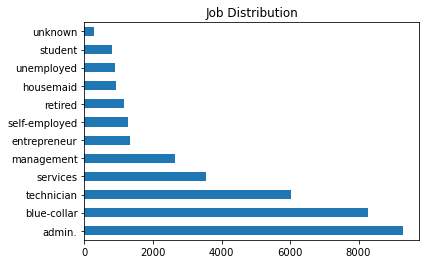

In [38]:
bank_df.job.value_counts().plot(kind = "barh").set(title = "Job Distribution")
print(bank_df.job.value_counts())

university.degree      10847
high.school             8501
basic.9y                5421
professional.course     4653
basic.4y                3485
basic.6y                2034
unknown                 1497
illiterate                16
Name: education, dtype: int64


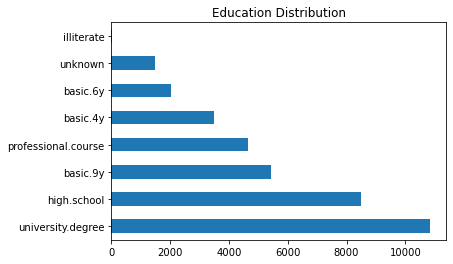

In [39]:
bank_df.education.value_counts().plot(kind = "barh").set(title = "Education Distribution")
print(bank_df.education.value_counts())

cellular     23408
telephone    13046
Name: contact, dtype: int64


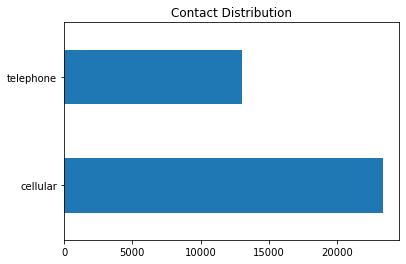

In [40]:
bank_df.contact.value_counts().plot(kind = "barh").set(title = "Contact Distribution")
print(bank_df.contact.value_counts())

In [41]:
# label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

l_col = ['month','day_of_week', 'poutcome']

label_encoder.fit(bank_df[l_col].values.flatten())

bank_df[l_col]=bank_df[l_col].apply(label_encoder.fit_transform)


In [42]:
poutcome_list = ['nonexistent', 'failure', 'success']
encoded_data, mapping_index = pd.Series(poutcome_list).factorize()
print('mapping_index :', mapping_index)
print('encoded_data :', encoded_data)

mapping_index : Index(['nonexistent', 'failure', 'success'], dtype='object')
encoded_data : [0 1 2]


In [43]:
bank_df.shape

(36454, 18)

In [44]:
bank_df.head(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
0,56,housemaid,married,basic.4y,0.0,0.0,telephone,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0.0,0.0,telephone,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

Text(0.5, 1.05, 'Pearson correlation of Features')

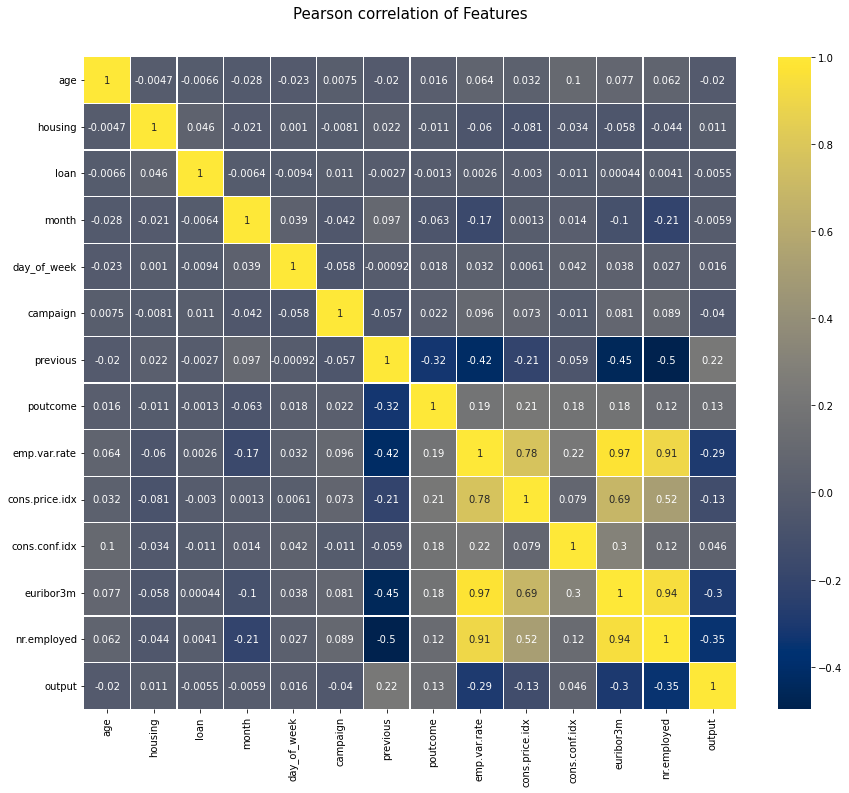

In [45]:
corr = bank_df.corr()

f, ax = plt.subplots(figsize=(15,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="cividis", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Text(0.5, 1.0, 'Client has not subscribed a term deposite')

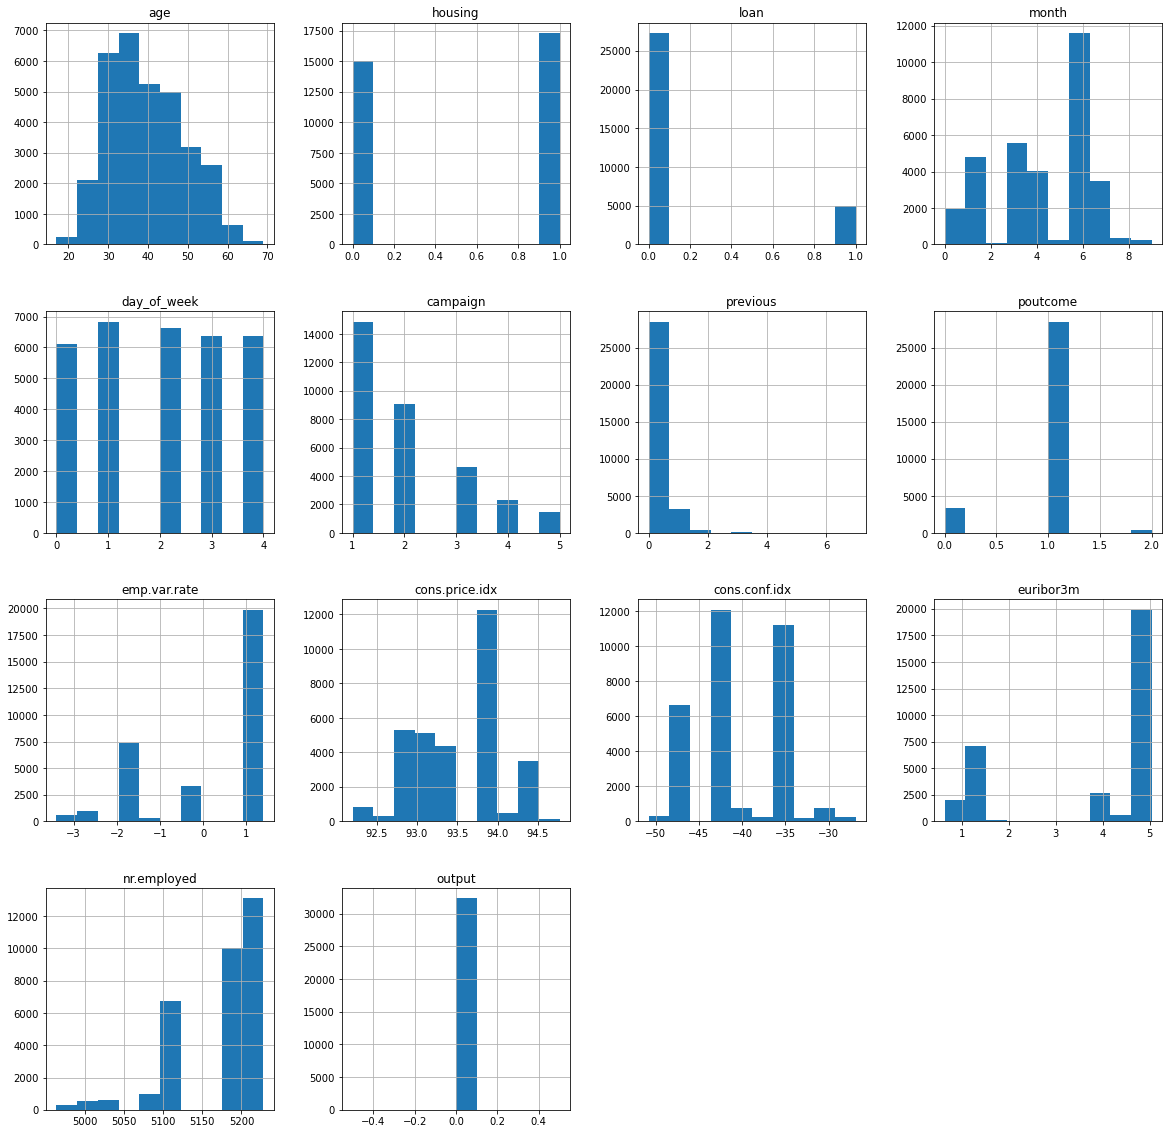

In [46]:
bank_df[bank_df['output'] == 0].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')

Text(0.5, 1.0, 'Client has not subscribed a term deposite')

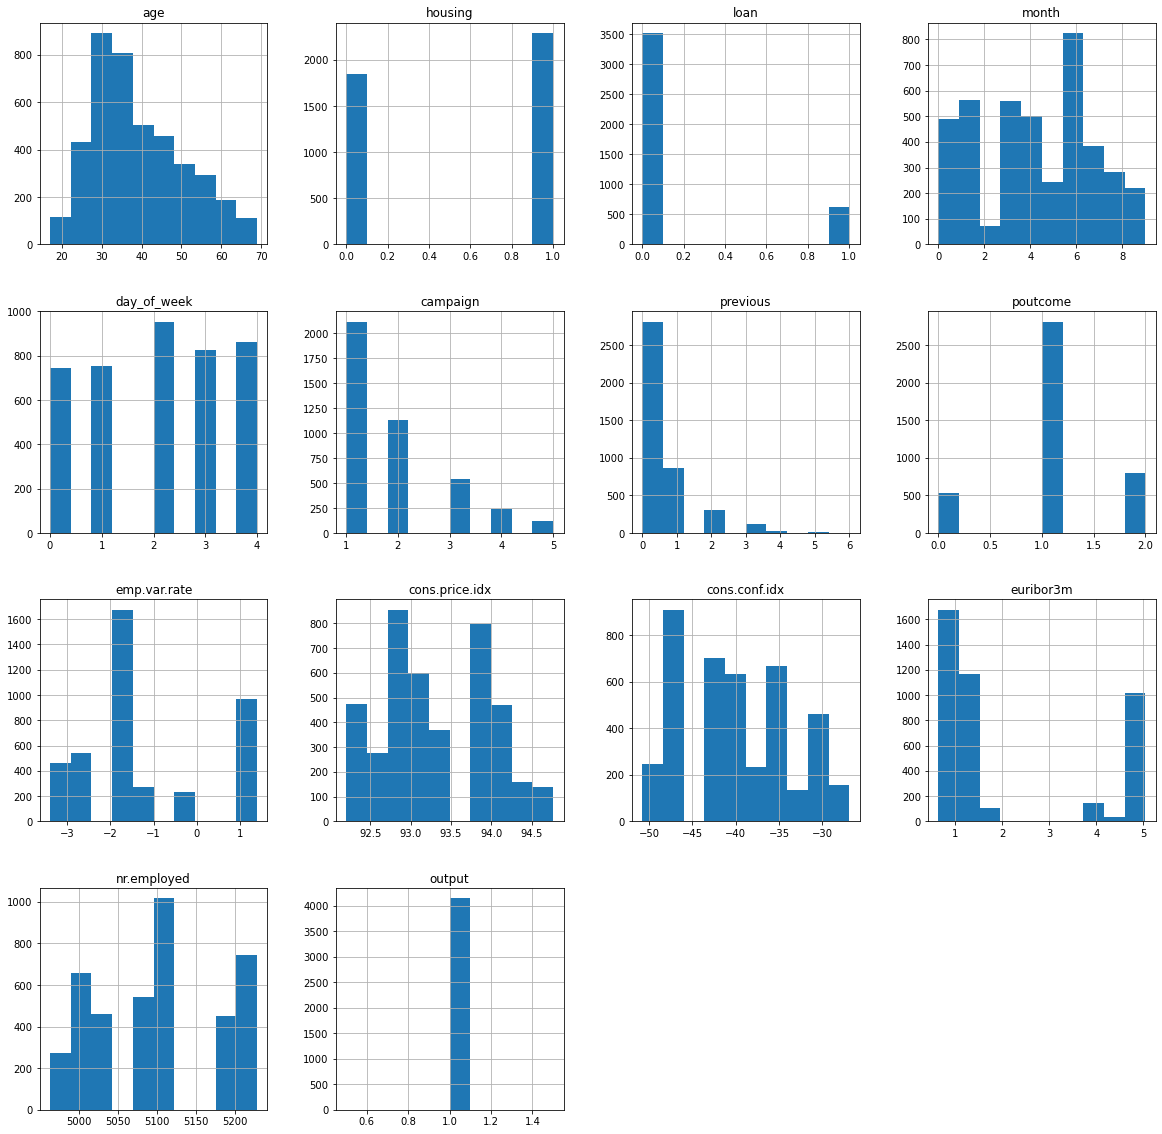

In [47]:
bank_df[bank_df['output'] == 1].hist(figsize = (20,20))
plt.title('Client has not subscribed a term deposite')

In [48]:
bank_df.groupby(by = ['age'])['output'].agg(["count", "mean"]).sort_values("mean", ascending=False)

,count,mean
age,,
65,41,0.512195
66,52,0.480769
64,55,0.472727
68,32,0.468750
19,40,0.450000
18,27,0.444444
61,70,0.442857
67,25,0.440000
69,32,0.406250


In [49]:
#  How many customers of different age groups didn't buy the product
age_for_out_0 = bank_df[bank_df['output'] == 0].groupby(['age']).size().reset_index(name='count') 
print (age_for_out_0)



    age  count
0    17      3
1    18     15
2    19     22
3    20     39
4    21     65
5    22     86
6    23    156
7    24    331
8    25    440
9    26    519
10   27    661
11   28    770
12   29   1142
13   30   1333
14   31   1551
15   32   1474
16   33   1438
17   34   1417
18   35   1427
19   36   1440
20   37   1190
21   38   1131
22   39   1176
23   40    957
24   41   1045
25   42    943
26   43    851
27   44    834
28   45    906
29   46    841
30   47    761
31   48    780
32   49    694
33   50    689
34   51    609
35   52    614
36   53    574
37   54    553
38   55    528
39   56    556
40   57    516
41   58    462
42   59    340
43   60    196
44   61     39
45   62     37
46   63     38
47   64     29
48   65     20
49   66     27
50   67     14
51   68     17
52   69     19


In [50]:
#  How many customers of different age groups bought the product
age_for_out_1 = bank_df[bank_df['output'] == 1].groupby(['age']).size().reset_index(name='count') 
print (age_for_out_1)


    age  count
0    17      1
1    18     12
2    19     18
3    20     23
4    21     27
5    22     35
6    23     47
7    24     78
8    25     86
9    26    114
10   27    109
11   28    145
12   29    178
13   30    189
14   31    204
15   32    175
16   33    196
17   34    178
18   35    159
19   36    143
20   37    131
21   38    134
22   39    104
23   40     78
24   41    101
25   42     85
26   43     78
27   44     73
28   45     91
29   46     74
30   47     48
31   48     94
32   49     55
33   50     76
34   51     67
35   52     78
36   53     63
37   54     60
38   55     49
39   56     74
40   57     58
41   58     54
42   59     59
43   60     55
44   61     31
45   62     24
46   63     17
47   64     26
48   65     21
49   66     25
50   67     11
51   68     15
52   69     13


In [51]:
bank_df.groupby(by = ['euribor3m'])['output'].agg(["count", "mean"])

,count,mean
euribor3m,,
0.634,8,0.750000
0.635,38,0.526316
0.636,13,0.230769
0.637,6,0.833333
0.638,5,0.800000
...,...,...
4.967,572,0.050699
4.968,809,0.066749
4.970,169,0.023669


In [52]:
 bank_df.groupby('euribor3m')['output'].count().sort_values(ascending=False)
# age_per_0.map(lambda x: '{:.2f}%'.format(x))


euribor3m
4.857    2630
4.963    2178
4.962    2163
4.961    1614
1.405    1092
         ... 
3.053       1
0.956       1
0.969       1
0.996       1
3.743       1
Name: output, Length: 315, dtype: int64

#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

In [53]:
# mean and count of job column
bank_df.groupby(by = ['job'])['output'].agg(["count", "mean"])

,count,mean
job,,
admin.,9306,0.136149
blue-collar,8274,0.071912
entrepreneur,1323,0.086924
housemaid,916,0.099345
management,2634,0.116173
retired,1168,0.188356
self-employed,1266,0.110585
services,3542,0.084133
student,812,0.322660


In [54]:
# How many customers with different jobs who bought the product
job_for_out_1 = bank_df[bank_df['output'] == 1].groupby(['job']).size().reset_index(name='count') 
print (job_for_out_1)


              job  count
0          admin.   1267
1     blue-collar    595
2    entrepreneur    115
3       housemaid     91
4      management    306
5         retired    220
6   self-employed    140
7        services    298
8         student    262
9      technician    678
10     unemployed    138
11        unknown     29


In [55]:
#  How many customers with different jobs who did't bought the product
job_for_out_0 = bank_df[bank_df['output'] == 0].groupby(['job']).size().reset_index(name='count') 
print (job_for_out_0)


              job  count
0          admin.   8039
1     blue-collar   7679
2    entrepreneur   1208
3       housemaid    825
4      management   2328
5         retired    948
6   self-employed   1126
7        services   3244
8         student    550
9      technician   5352
10     unemployed    761
11        unknown    255


In [56]:
# mean and count of education column
bank_df.groupby(by = ['education'])['output'].agg(["count", "mean"])

,count,mean
education,,
basic.4y,3485,0.082927
basic.6y,2034,0.083088
basic.9y,5421,0.079506
high.school,8501,0.112810
illiterate,16,0.187500
professional.course,4653,0.114980
university.degree,10847,0.142528
unknown,1497,0.138277


In [57]:
edu_for_out_1 = bank_df[bank_df['output'] == 1].groupby(['education']).size().reset_index(name='count') 
print (edu_for_out_1)


             education  count
0             basic.4y    289
1             basic.6y    169
2             basic.9y    431
3          high.school    959
4           illiterate      3
5  professional.course    535
6    university.degree   1546
7              unknown    207


In [58]:
edu_for_out_0 = bank_df[bank_df['output'] == 0].groupby(['education']).size().reset_index(name='count') 
print (edu_for_out_0)


             education  count
0             basic.4y   3196
1             basic.6y   1865
2             basic.9y   4990
3          high.school   7542
4           illiterate     13
5  professional.course   4118
6    university.degree   9301
7              unknown   1290


#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

 <font color="blue">**The above analysis shows that the count of age column represents that numbers of customers didn't buy the product so it might be not featue**

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [59]:
# OneHot Encoding 
bank_df_dummies = pd.get_dummies(bank_df, columns = ['job','marital','education', 'contact'], drop_first= True)

In [60]:
## Converting categorical columns to numerical features using OneHot Encoding 
bank_df_dummies.columns

Index(['age', 'housing', 'loan', 'month', 'day_of_week', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'output',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown',
       'contact_telephone'],
      dtype='object')

In [61]:
bank_df_dummies.drop(['marital_unknown', 'job_unknown', 'education_unknown' ],axis=1,inplace=True)

In [62]:
bank_df_dummies.drop(['housing', 'loan', 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1,inplace=True)

In [63]:
bank_df_dummies.head()

,age,month,day_of_week,campaign,previous,poutcome,output,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone
0,56,6,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,57,6,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,37,6,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,40,6,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,56,6,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [64]:
X = bank_df_dummies.drop('output',axis=1)
y = bank_df_dummies['output']

In [65]:
X.shape

(36454, 25)

In [66]:
y.shape

(36454,)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29163, 25)
(7291, 25)
(29163,)
(7291,)


#### 3. Train a classifier on the training data

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [70]:
model.fit(X_train, y_train)

C:\Users\jaspr\miniconda3\envs\python_GA\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#### 4. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class.

In [71]:
y_pred_test = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = y_pred_test, y_true = y_test)
print(f'Accuracy of the model Logistic Regression is {accuracy*100:.2f}%')

Accuracy of the model Logistic Regression is 89.32%


In [73]:
accuracy_train= model.score(X_train,y_train)
print(f'The Train accuracy of the Logistic Regression is {accuracy_train*100:.2f}%' )

The Train accuracy of the Logistic Regression is 89.42%


#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[6412,   54],
       [ 725,  100]], dtype=int64)

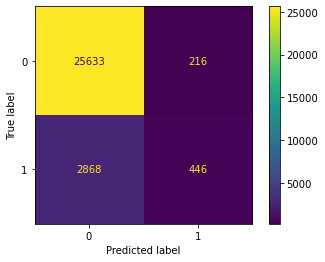

In [75]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

#### 6. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [76]:
print("Predicted value: ", y_pred_test[:10])
print("Actual value: ",  y_test[:10])

Predicted value:  [0 0 0 0 0 1 0 0 0 0]
Actual value:  12765    0
11444    1
12352    0
28896    0
19148    0
39842    0
27672    0
2729     0
18153    0
25697    0
Name: output, dtype: int64


In [77]:
y_bool = y_pred_test==y_test
y_bool.value_counts()

True     6512
False     779
Name: output, dtype: int64

#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

In [78]:
from sklearn.neighbors import KNeighborsClassifier

**Use StandardScaler for KNN algorithm to achieve the maximize accuracy**

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [80]:
# for i in range(1,10,2):
#     knn= KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_s,y_train)
#     y_pred = knn.predict(X_test_s)
#     accuracy = accuracy_score(y_test,y_pred)
#     train_acc = knn.score(X_train_s,y_train)
#     print(f"For K={i} test accuracy score is {accuracy} :".format(i,accuracy))
#     print(f"For K={i} train accuracy score is {accuracy} :".format(i,train_acc))
#     print()

In [81]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X_train,y_train)
y_pred_knn1 = knn1.predict(X_test)
knn1.score(X_train,y_train)

0.9063882316634091

In [82]:
print("Accuracy score for knn1 model :", accuracy_score(y_test,y_pred_knn1))

Accuracy score for knn1 model : 0.8872582636126731


In [83]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_train,y_train)
y_pred_knn2 = knn2.predict(X_test)
knn2.score(X_train,y_train)

0.8996330967321606

In [84]:
knn2.score(X_test,y_test)

0.8879440405979976

In [90]:
accuracy_score_knn2 = accuracy_score(y_test,y_pred_knn2)
print(f"Accuracy score for knn2 model is  {accuracy_score_knn2*100:.2f}%", )


Accuracy score for knn2 model is  88.79%


#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?

In [86]:
confusion_matrix(y_test, y_pred_knn1)

array([[6354,  112],
       [ 710,  115]], dtype=int64)

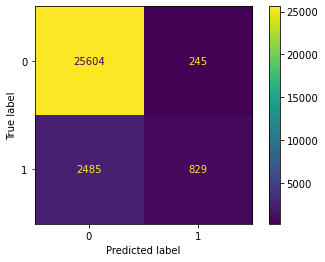

In [87]:
plot_confusion_matrix(knn1, X_train, y_train)

In [93]:
confusion_matrix(y_test, y_pred_knn2)

array([[6383,   83],
       [ 734,   91]], dtype=int64)

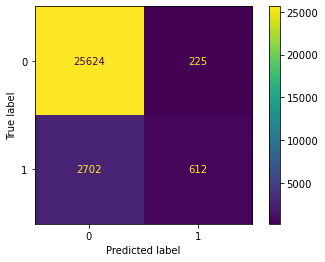

In [94]:
plot_confusion_matrix(knn2, X_train, y_train)

**Logistic regression has less numbers of false positive as compared to K-nearest neighbours but false negative values are less for knn**